![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 2: Standard and Multi-RPYS Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [1]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.7)

plt.rc("savefig", dpi=300) # improve default resolution of graphics

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)

## Standard Reference Publication Year Spectroscopy (RPYS)


In [3]:
stan_results = RC.rpys(1900,2015) # takes a min and max year

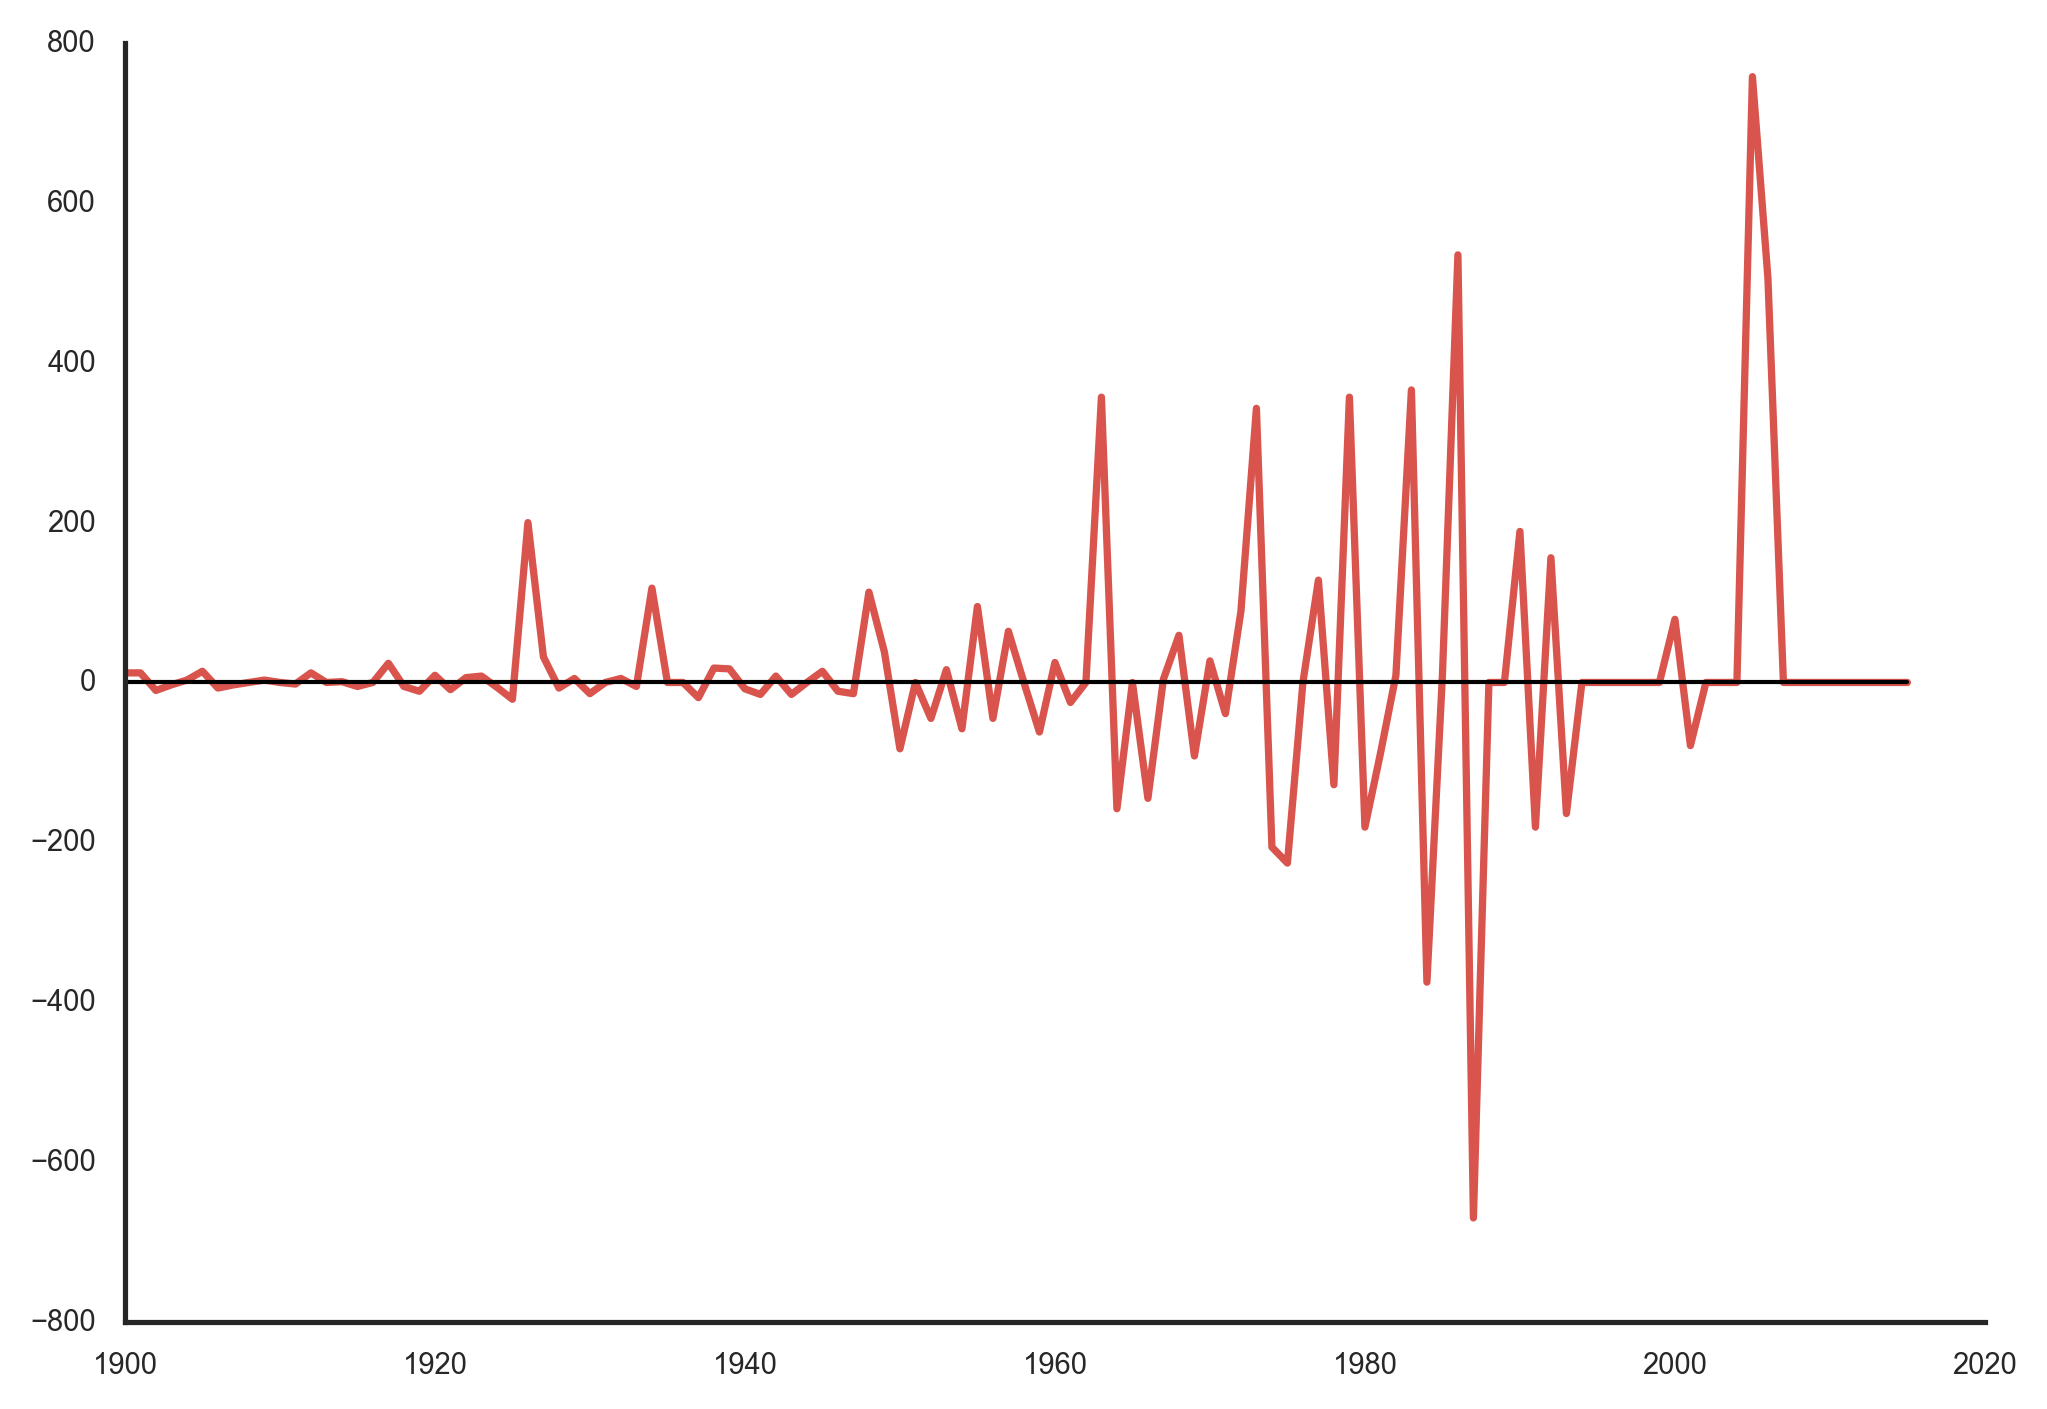

In [4]:
dev_line_color = sns.xkcd_rgb["pale red"]

with sns.axes_style("white"):
    plt.plot(stan_results['year'],stan_results['abs-deviation'], color = dev_line_color)
    plt.plot([1900,2015], [0, 0], linewidth=1, color = "black") # add a line at 0 to emphasize deviations.
    sns.despine()
plt.savefig("figures/rpys_standard.pdf")

Once we identify a year (or years) that we want to inspect further, we can use the `getCitations` method to see the published records.

In [5]:
year_results = RC.getCitations('year', 1963, pandasFriendly=True)
pandas.DataFrame(year_results).sort_values(['num-cites'], ascending=False)

,author,citeString,fraction-cites-overall,fraction-cites-year,journal,num-cites,year
94,De Solla Price Derek J,"De Solla Price Derek J., 1963, LITTLE SCI BIG SCI",0.187050,0.187050,LITTLE SCI BIG SCI,156,1963
145,Kessler Mm,"KESSLER MM, 1963, AM DOC, V14, P10, DOI 10.100...",0.128297,0.128297,AM DOC,107,1963
56,Price D J D S,"Price D. J. d. S, 1963, LITTLE SCI BIG SCI",0.100719,0.100719,LITTLE SCI BIG SCI,84,1963
67,Garfield E,"GARFIELD E, 1963, AM DOC, V14, P289, DOI 10.10...",0.083933,0.083933,AM DOC,70,1963
68,Price Djd,"PRICE DJD, 1963, LITTLE SCI BIG SCI, P48",0.021583,0.021583,LITTLE SCI BIG SCI,18,1963
156,Abramson N,"Abramson N., 1963, INFORM THEORY CODING",0.020384,0.020384,INFORM THEORY CODING,17,1963
106,Ward Jh,"WARD JH, 1963, J AM STAT ASSOC, V58, P236, DOI...",0.014388,0.014388,J AM STAT ASSOC,12,1963
109,Weinberg Am,"WEINBERG AM, 1963, MINERVA, V1, P159, DOI 10.1...",0.013189,0.013189,MINERVA,11,1963
176,Kelly G A,"Kelly G. A., 1963, THEORY PERSONALITY P",0.010791,0.010791,THEORY PERSONALITY P,9,1963
236,Price Dd,"PRICE DD, 1963, LITTLE SCI BIG SCI, P65",0.010791,0.010791,LITTLE SCI BIG SCI,9,1963


### Multi RPYS

As described in the article, Multi RPYS segements the articles by publication date and performs a seperate RPYS analysis for each year. The following code executes that workflow, and then creates a table that can be plotted as a heatmap. 

In [6]:
minYear = 1950
maxYear = 2015

years = range(minYear, maxYear+1)

dictionary = {'CPY': [],
             "abs-deviation": [],
             "num-cites": [],
             "rank": [],
             "RPY": []}
for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            rpys = RCyear.rpys(minYear=minYear, maxYear=i)
            length = len(rpys['year'])
            rpys['CPY'] = [i]*length

            dictionary['CPY'] += rpys['CPY']
            dictionary['abs-deviation'] += rpys['abs-deviation']
            dictionary['num-cites'] += rpys['count']
            dictionary['rank'] += rpys['rank']
            dictionary['RPY'] += rpys['year']
    except:
        pass

multi_rpys = pandas.DataFrame.from_dict(dictionary)
multi_rpys.to_csv("generated_datasets/multi_rpys.csv")

In [7]:
hm_table = multi_rpys.pivot('CPY', 'RPY', 'rank')
hm_table

RPY,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
CPY,,,,,,,,,,,,,,,,,,,,,
1978,22.0,0.0,0.0,23.0,8.0,9.0,5.0,24.0,6.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,10.0,22.0,7.0,21.0,11.0,12.0,8.0,28.0,9.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,6.0,10.0,7.0,11.0,12.0,8.0,23.0,13.0,14.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,12.0,0.0,13.0,24.0,0.0,14.0,15.0,16.0,9.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,12.0,13.0,0.0,26.0,9.0,14.0,7.0,32.0,24.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,25.0,0.0,0.0,22.0,0.0,23.0,13.0,26.0,14.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,10.0,23.0,7.0,13.0,14.0,24.0,15.0,28.0,16.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,13.0,14.0,6.0,15.0,8.0,16.0,17.0,18.0,27.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.0,29.0,0.0,0.0,16.0,17.0,18.0,19.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


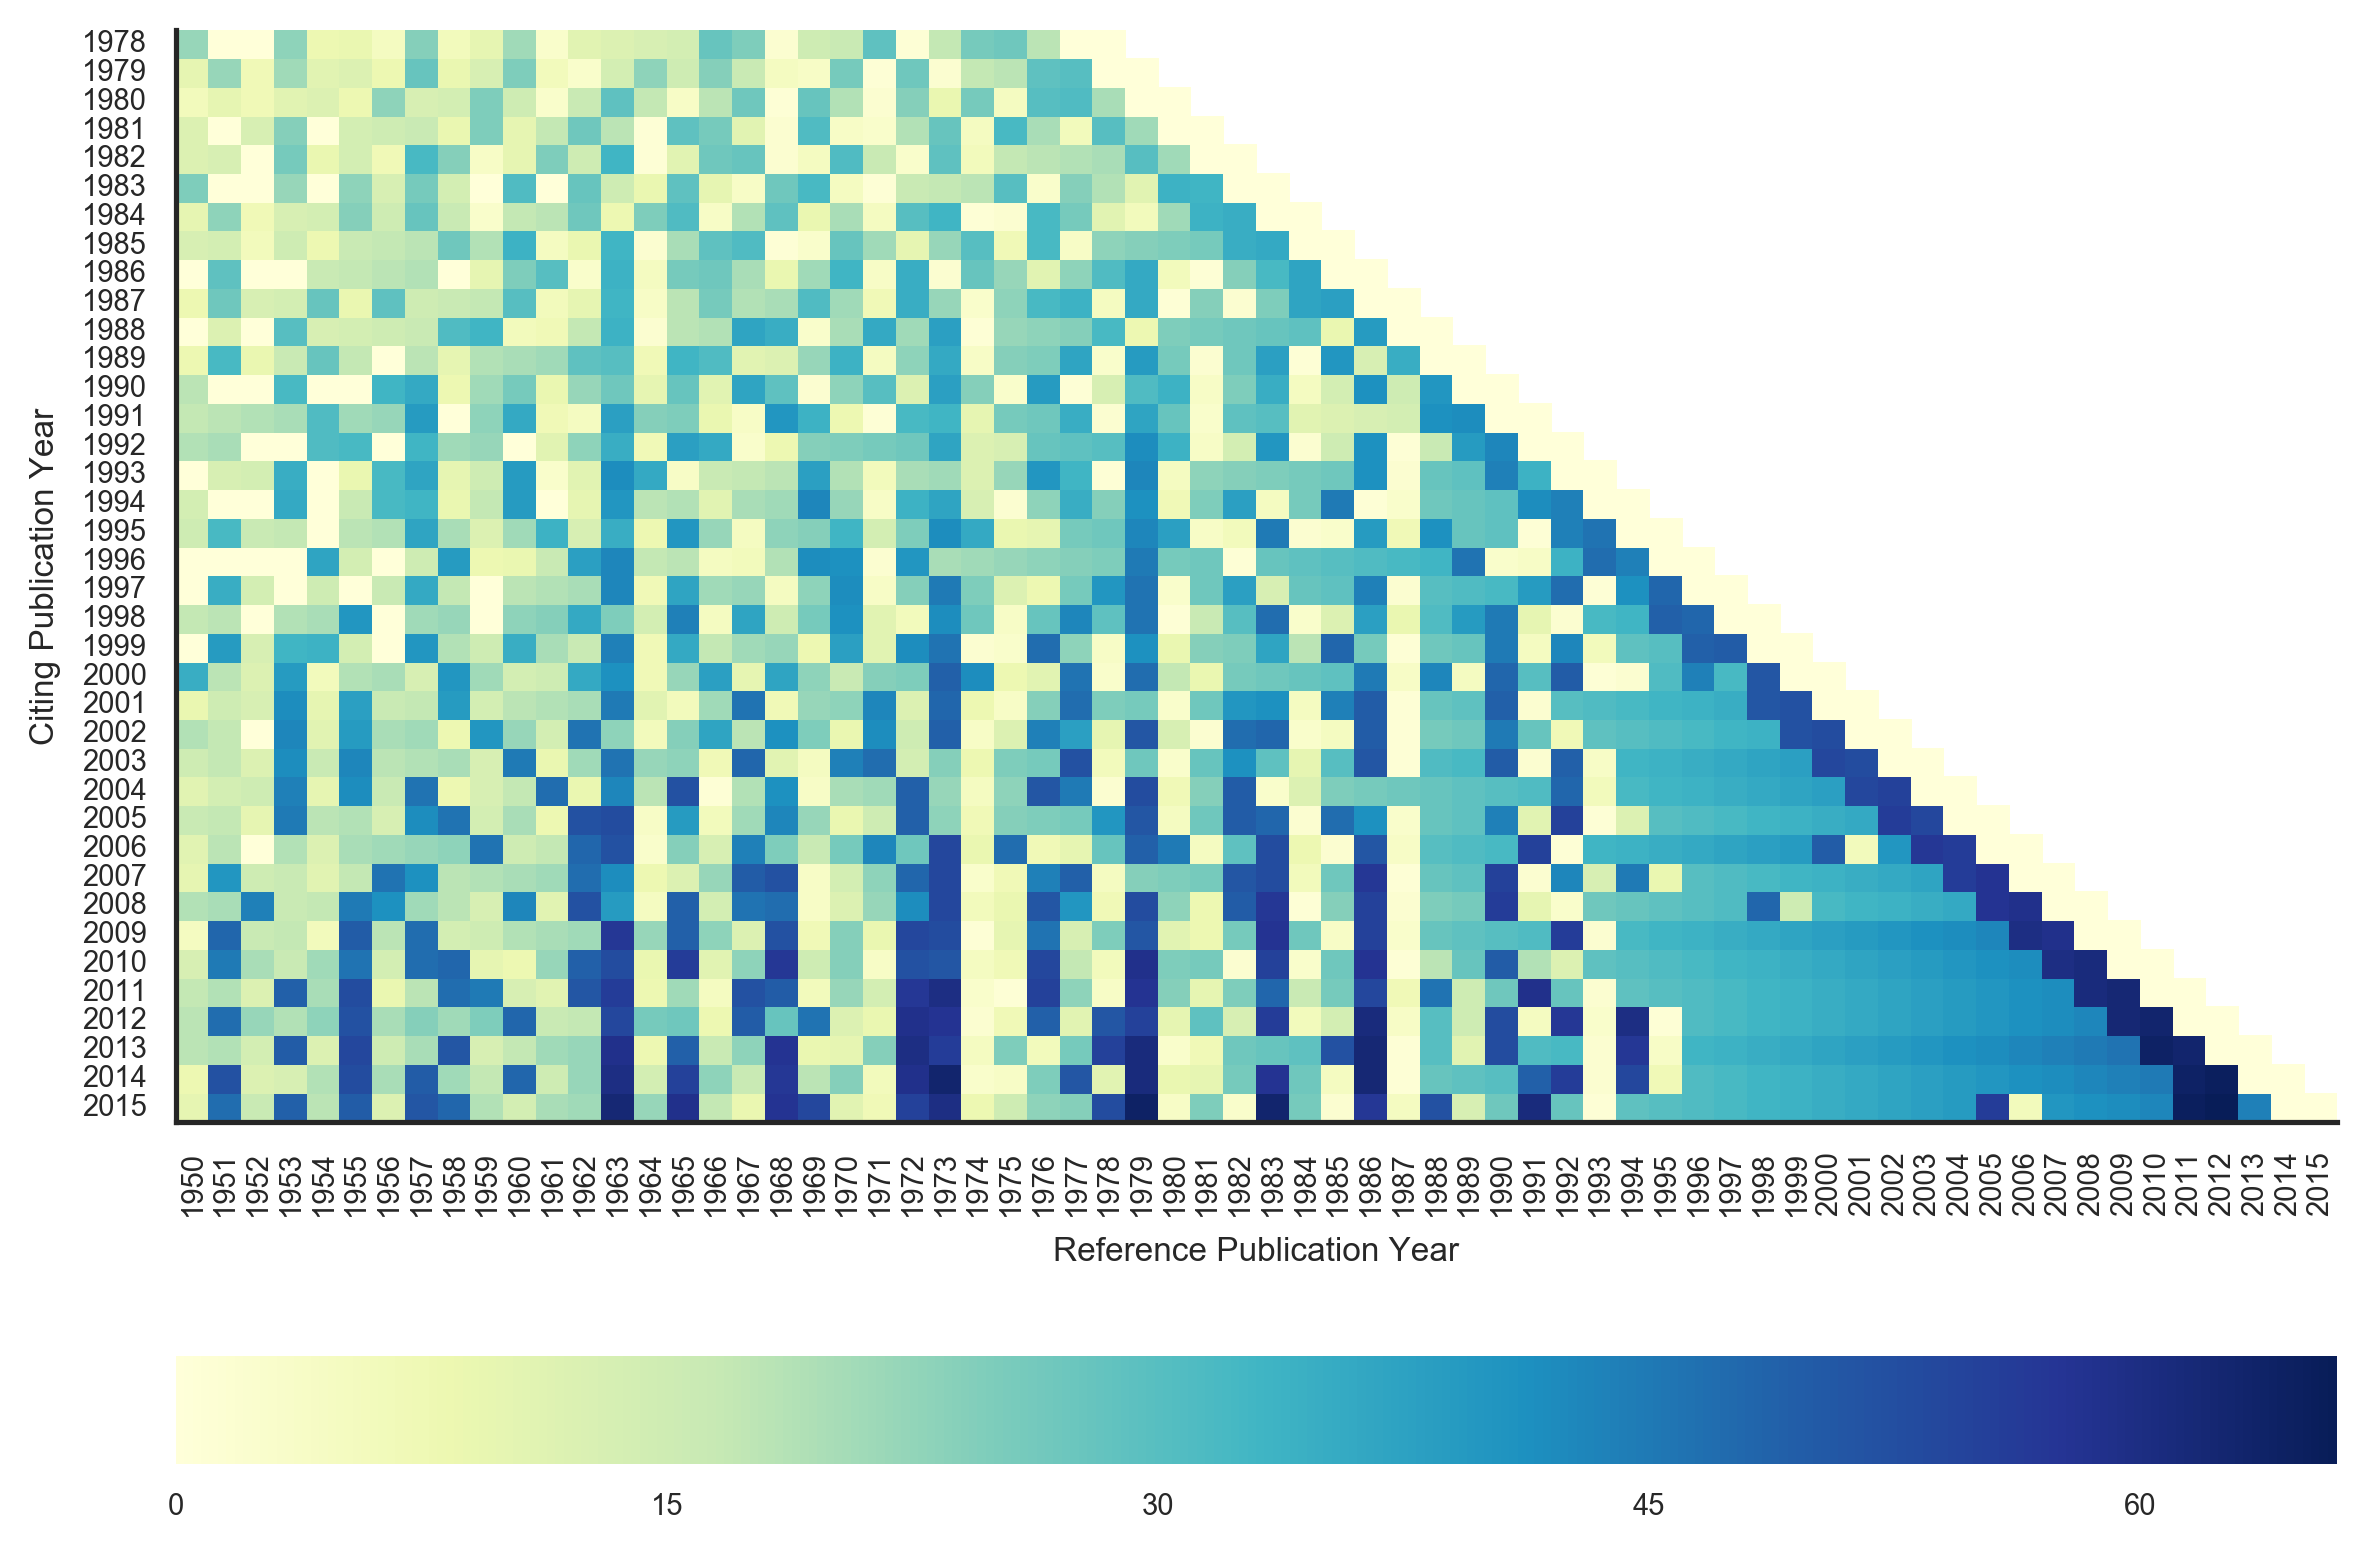

In [8]:
with sns.axes_style("white"):
    sns.heatmap(hm_table, square = False, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})
    plt.xlabel('Reference Publication Year', size = 8)
    plt.ylabel('Citing Publication Year', size = 8)
    sns.despine()
    plt.tight_layout()
plt.savefig("figures/rpys_multi.pdf")

# Interactive Standard and Multi RPYS Graphs with *mkD3*

Exploratory RPYS analysis is much easier and faster with interactive graphs. 

### Standard RPYS

In [9]:
# Create the RPYS File
standard_rpys = pandas.DataFrame.from_dict(stan_results)
standard_rpys.to_csv("generated_datasets/standard_rpys.csv")

# Create the Citation File
cits = RC.getCitations()
citations = pandas.DataFrame.from_dict(cits)
citations.to_csv("generated_datasets/standard_citation.csv")

# Create Link to Graphs
from IPython.display import display, HTML, DisplayObject
display(HTML('<a href="mkD3_static/standardBar.html" target="_blank">Open standard RPYS bar graph.</a>'))
display(HTML('<a href="mkD3_static/standardLine.html" target="_blank">Open standard RPYS line graph.</a>'))

### Multi RPYS

A multi RPYS file was created earlier. Now we just need to create the citation file.

In [10]:
dictionary = {"author": [],
              "journal": [],
              "cite-string": [],
              "num-cites": [],
              "RPY": [],
              "CPY": []}

for i in years:
    try:
        RCyear = RC.yearSplit(i, i)
        if len(RCyear) > 0:
            citations = RCyear.getCitations(pandasFriendly=True)
            length = len(citations['year'])
            citations['CPY'] = [i]*length

            dictionary['CPY'] += citations['CPY']
            dictionary['author'] += citations['author']
            dictionary['journal'] += citations['journal']
            dictionary['cite-string'] += citations['citeString']
            dictionary['num-cites'] += citations['num-cites']
            dictionary['RPY'] += citations['year']
    except:
        pass

multi_citations = pandas.DataFrame.from_dict(dictionary)
multi_citations.to_csv("generated_datasets/multi_citation.csv")


# Create Link to Heatmap
display(HTML('<a href="mkD3_static/multiRPYS.html" target="_blank">Open multi RPYS heatmap.</a>'))
